# Preparing Data

In [1]:
import numpy as np

In [2]:
observations = 1000
x1 = np.random.uniform(-10, 10, (observations,1))
x2 = np.random.uniform(-10, 10, (observations,1))
x3 = np.random.uniform(-10, 10, (observations,1))
x = np.column_stack([x1,x2,x3])

w = np.array([2,3,4])
w = w.T

b = 5

# flatten() change the shape form (100,1) [matrix] to (100,) [vector]
noise = np.random.uniform(-1, 1, (observations,1)).flatten()

y = (np.dot(x,w) + b) + noise

print(x.shape)
print(w.shape)
print(noise.shape)
print(y.shape)

(1000, 3)
(3,)
(1000,)
(1000,)


# Splitting Data

In [3]:
total_samples_count = observations
train_samples_count = int(0.8*observations)
validation_samples_count = int(0.1*observations)
test_samples_count = total_samples_count - train_samples_count - validation_samples_count

train_inputs = x[:train_samples_count]
train_targets = y[:train_samples_count]

validation_inputs = x[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = y[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = x[train_samples_count+validation_samples_count:]
test_targets = y[train_samples_count+validation_samples_count:]

# Training Model

Epoch 1/10000
8/8 - 0s - loss: 293.3861 - val_loss: 140.1513
Epoch 2/10000
8/8 - 0s - loss: 84.3932 - val_loss: 27.4977
Epoch 3/10000
8/8 - 0s - loss: 31.2633 - val_loss: 11.7764
Epoch 4/10000
8/8 - 0s - loss: 12.2442 - val_loss: 5.4343
Epoch 5/10000
8/8 - 0s - loss: 5.8351 - val_loss: 1.5359
Epoch 6/10000
8/8 - 0s - loss: 2.8221 - val_loss: 1.1288
Epoch 7/10000
8/8 - 0s - loss: 1.1816 - val_loss: 1.4657
Epoch 8/10000
8/8 - 0s - loss: 0.8625 - val_loss: 0.8001
Epoch 9/10000
8/8 - 0s - loss: 0.5995 - val_loss: 0.6021
Epoch 10/10000
8/8 - 0s - loss: 0.4970 - val_loss: 0.4395
Epoch 11/10000
8/8 - 0s - loss: 0.4107 - val_loss: 0.3687
Epoch 12/10000
8/8 - 0s - loss: 0.3669 - val_loss: 0.3276
Epoch 13/10000
8/8 - 0s - loss: 0.3463 - val_loss: 0.3311
Epoch 14/10000
8/8 - 0s - loss: 0.3433 - val_loss: 0.3329
Epoch 15/10000
8/8 - 0s - loss: 0.3445 - val_loss: 0.3265
Epoch 16/10000
8/8 - 0s - loss: 0.3497 - val_loss: 0.3559
Epoch 17/10000
8/8 - 0s - loss: 0.3488 - val_loss: 0.3327
Epoch 18/10000

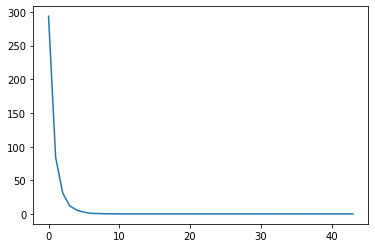

[array([[2.0083203],
       [3.0038278],
       [4.002934 ]], dtype=float32), array([4.994357], dtype=float32)]


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# in this example the equation is y = x1w1 + x2w2 + x3w3 + b + noise
# if hidden_layer_size = 3 will give 3 weights and bias
# if hidden_layer_size = 5 will give 5 weights and bias (which make the prediction equation more complicated than original)
# for this kind of equation, use 1 layer is good enough
input_size = 3
output_size = 1
hidden_layer_size = 3
model_number = 1

layer0 = tf.keras.layers.Dense(units=hidden_layer_size, activation=tf.keras.activations.relu)
layer1 = tf.keras.layers.Dense(units=output_size)

if model_number == 1:
    model = tf.keras.Sequential([layer1])
else:
    model = tf.keras.Sequential([layer0, layer1])

opt1 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt2 = tf.keras.optimizers.Adam(1)

# metrics=['accuracy'] should be used in classification but not regression
# because the results of regression is hard to exact match, therefore accuracy always give 0
# for classifcation between cat and dog can give accuracy, because you will only output cat and dog but not something in between
#model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer=opt2)



# https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
# For Batch Gradient Descent => batch_size = size of training set
# For Stochastic Gradient Descent => Set batch_size=1
# for Mini-batch Gradient Descent => Set 1 < batch_size < size of traing set

# We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

batch_size = 100
max_epochs = 10000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20)

history = model.fit(train_inputs, 
          train_targets, 
          batch_size=batch_size, 
          epochs=max_epochs, 
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets), 
          verbose = 2 
          )  

plt.plot(history.history['loss'])
plt.show()


weights = layer1.get_weights()
print(weights)

In [5]:
test_loss = model.evaluate(test_inputs, test_targets)
print(test_loss)

4/4 [==============================] - 0s 1ms/step - loss: 0.3440
0.3439992070198059


In [6]:
model.predict([[10,10,10]])

array([[95.14517]], dtype=float32)